# Analysis of effects of Lockdown due to COVID-19 on Pollution levels in India
#### Lockdown in India began on 25th March 2020, when the Indian Goverment put all 1.3 billion of its citizens under mandatory lockdown, as a precautionary measure in order to slowdown the spread of COVID-19 in the country. Only essential services such as medical, water, electricity and grocery services remained active.


# Objective
#### In this project we will attempt to determine the effects of the lockdown on the pollution levels in various cities in India. We have been reading reports of clear skies from all across India and will attempt to see if this claim is supported by the data. We have access to a large database containing pollution data dating from 1st January 2015 to 1st May 2020. 

# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid',context='notebook')
%matplotlib inline
from pandas_profiling import ProfileReport

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv
/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv


# Importing the Data

In [2]:
city_day=pd.read_csv('/kaggle/input/air-quality-data-in-india/city_day.csv')
print(city_day.shape)
city_day.head()

(26219, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Exploring the data

### Explanation of some features of the dataset:
1. PM2.5 - It refers to particles that have diameter less than 2.5 micrometres and remain suspended for longer. These particles are formed as a result of burning fuel and chemical reactions that take place in the atmosphere.
2. PM10 - They are very small particles found in dust and smoke. They have a diameter of 10 micrometres (0.01 mm) or smaller. PM10 particles are a common air pollutant
3. CO - Carbon monoxide is a temporary atmospheric pollutant in some urban areas, chiefly from the exhaust of internal combustion engines (including vehicles, portable and back-up generators, etc.), but also from incomplete combustion of various other fuels (including wood, coal, natural gas, and trash).
4. NH3 - Ammonia is a chemical found in trace quantities in nature, being produced from nitrogenous animal and vegetable matter.
5. SO2 - Sulfur dioxide is a noticeable component in the atmosphere, especially following volcanic eruptions. It is a major air pollutant and has significant impacts upon human health.
6. NOx - In atmospheric chemistry, NOx is a generic term for the nitrogen oxides that are most relevant for air pollution, namely nitric oxide (NO) and nitrogen dioxide (NO2). These gases contribute to the formation of smog and acid rain, as well as affecting tropospheric ozone. NOx gases are usually produced from the reaction among nitrogen and oxygen during combustion of fuels, such as hydrocarbons in air.
7. AQI - It stands for Air Quality Index. It is the most important metric in the measurement of air pollution and is considered as the overall pollution level at a location at any given point of time. It is calculated by transforming the weighted values of 8 individual air pollutantion related parameters (PM10, PM2.5, NO2, SO2, CO, O3, Pb and NH3) into a single number or set of numbers. 
**The index has 6 categories: Good (0-50), Satisfactory (51-100), Moderately polluted (101-200), Poor (201-300), Very poor (301-400) and Severe (> 401).**


In [3]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26219 non-null  object 
 1   Date        26219 non-null  object 
 2   PM2.5       21930 non-null  float64
 3   PM10        15453 non-null  float64
 4   NO          22986 non-null  float64
 5   NO2         23002 non-null  float64
 6   NOx         22176 non-null  float64
 7   NH3         16372 non-null  float64
 8   CO          24258 non-null  float64
 9   SO2         22675 non-null  float64
 10  O3          22559 non-null  float64
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [4]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


* As we can see, many of the colums have a significant amount of null values present in them, especially PM10, NH3 and Xylene.
* Date column exists as an object dtype and is not in datetime format, we will have to rectify that.

# Analysing missing values

The DataFrame has 16 columns.
There are 14 columns that have missing values.


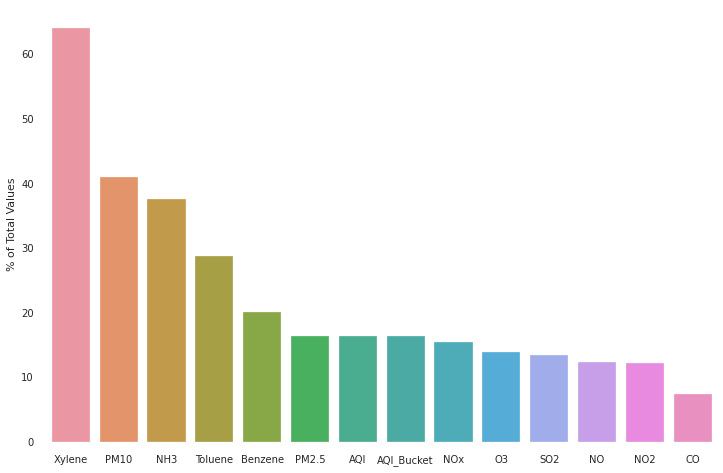

,Missing Values,% of Total Values
Xylene,16807,64.10
PM10,10766,41.06
NH3,9847,37.56
Toluene,7555,28.81
Benzene,5287,20.16
PM2.5,4289,16.36
AQI,4282,16.33
AQI_Bucket,4282,16.33
NOx,4043,15.42
O3,3660,13.96


In [5]:
def missing_values_table(df):
        # Total missing values
        missing_val = df.isnull().sum()
        
        # Percentage of missing values
        missing_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
        
        # Rename the columns
        missing_val_table_ren_columns = missing_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing values in descending order, 
        # ignoring the colums with no missing values.
        missing_val_table_ren_columns = missing_val_table_ren_columns[
            missing_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        
        # Print some summary information
        print ("The DataFrame has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        plt.subplots(figsize=(12,8))
        sns.barplot(y=missing_val_table_ren_columns['% of Total Values'],x=missing_val_table_ren_columns.index)
        plt.show()
        # Return the dataframe with missing information
        return missing_val_table_ren_columns
    
missing_values_table(city_day)

* NH3 and PM10 have missing values in more than 30% of the entries, whereas Xylene has missing values in a massive 64% of rows.
* As a large percentage of values in Benzene, Xylene and Toulene columns are zero, we can combine them with each other to simplify the data and make visualization easier.

In [6]:
city_day1=city_day.copy()

In [7]:
city_day['BTX']=city_day['Benzene'] + city_day['Toluene'] + city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1,inplace=True)
city_day[city_day['City']=='Gurugram'].tail(7)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX
12954,Gurugram,2020-04-25,26.55,63.78,4.25,12.23,10.32,40.59,0.58,8.55,73.49,121.0,Moderate,12.30
12955,Gurugram,2020-04-26,49.26,119.82,11.76,13.94,11.22,43.40,0.67,8.79,62.13,113.0,Moderate,11.46
12956,Gurugram,2020-04-27,25.94,46.63,4.24,10.35,9.44,38.04,0.54,7.90,67.03,103.0,Moderate,10.71
12957,Gurugram,2020-04-28,34.20,58.26,4.48,11.32,10.31,37.56,0.63,7.02,74.53,118.0,Moderate,10.80
12958,Gurugram,2020-04-29,58.64,111.67,4.39,13.84,11.56,28.22,0.75,7.75,66.09,126.0,Moderate,11.92
12959,Gurugram,2020-04-30,62.21,122.56,4.47,12.84,10.82,22.41,0.76,7.88,70.10,141.0,Moderate,11.83
12960,Gurugram,2020-05-01,51.76,124.14,6.64,17.56,14.14,12.75,1.73,8.43,41.84,164.0,Moderate,11.94


### The missing values can be present due to
* Accidental Deletion of data
* Faulty Equipment
* Values not being recorded

# Converting Date column to datetime format

In [8]:
city_day['Date'] = pd.to_datetime(city_day['Date'])
print('Data is available for the period {} to {} '.format(city_day['Date'].min(),city_day['Date'].max()))

Data is available for the period 2015-01-01 00:00:00 to 2020-05-01 00:00:00 


In [9]:
cities_all=city_day['City'].value_counts()
print('We have data for the following cities:')
print(list(cities_all.index))

We have data for the following cities:
['Delhi', 'Ahmedabad', 'Bengaluru', 'Chennai', 'Lucknow', 'Mumbai', 'Hyderabad', 'Patna', 'Gurugram', 'Amritsar', 'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam', 'Aizawl']


# Visualising Data

#### We group the data by cities and sort them by taking the mean of the levels of all the pollutants.

In [10]:
def city_wise_pollution(pollutant):
    i=city_day[[pollutant,'City']].groupby('City').mean().sort_values(by=pollutant,ascending=False).reset_index()
    return i[:10].style.background_gradient(cmap='PuBu')

In [11]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

#### This code cell allows us to create multiple tables side by side in order for us to effectively compare the magnitude of different pollutants in different cities.

In [12]:
pm25=city_wise_pollution('PM2.5')
pm10=city_wise_pollution('PM10')
btx=city_wise_pollution('BTX')
so2=city_wise_pollution('SO2')
no2=city_wise_pollution('NO2')
co=city_wise_pollution('CO')
nh3=city_wise_pollution('NH3')
AQI=city_wise_pollution('AQI')

pollutants=['PM2.5','PM10','SO2','BTX','CO','NH3','NO2']

display_side_by_side(pm25,pm10,btx,so2,no2,co,nh3,AQI)

,City,PM2.5
0,Patna,127.480474
1,Gurugram,119.798880
2,Delhi,119.270642
3,Lucknow,111.627367
4,Ahmedabad,69.659932
5,Guwahati,69.561318
6,Kolkata,68.692092
7,Jorapokhar,65.903602
8,Brajrajnagar,63.882500
9,Talcher,63.740464


* Maximum level of pollutants are observed in Delhi, Patna, Gurugram and Ahmedabad.
* Ahemdabad has an unsually high mean AQI level.


# Let's visualize these values in the form of a bar plot to get a better understanding.

In [13]:
def barplot(df,pollutant):
    bar=df[[pollutant,'City']].groupby(['City']).mean().sort_values(by=pollutant,ascending=False).reset_index()
    ax,fig=plt.subplots(figsize=(16,6))
    sns.barplot(x='City',y=pollutant,data=bar,palette='viridis')
    plt.xlabel('City',fontsize=16)
    plt.ylabel(pollutant,fontsize=16)
    plt.xticks(rotation=45,horizontalalignment='center',fontsize=12)

# 1. PM2.5

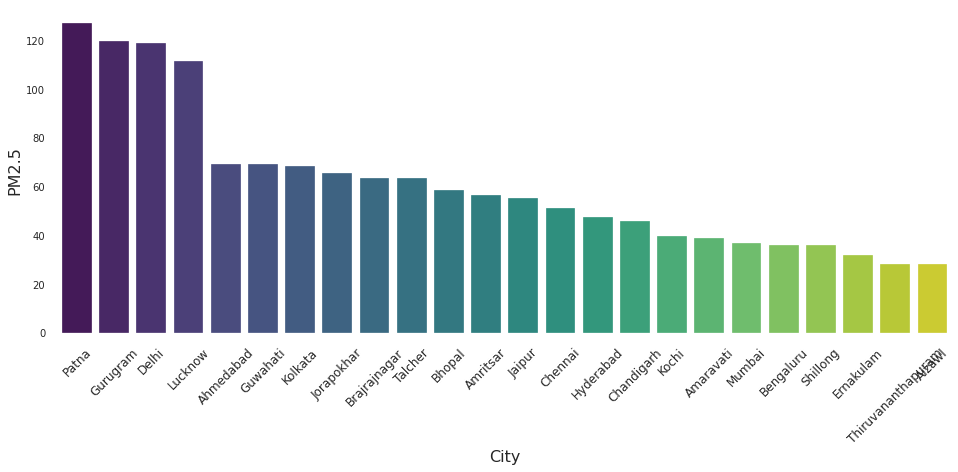

In [14]:
barplot(city_day,'PM2.5')

# 2. PM10

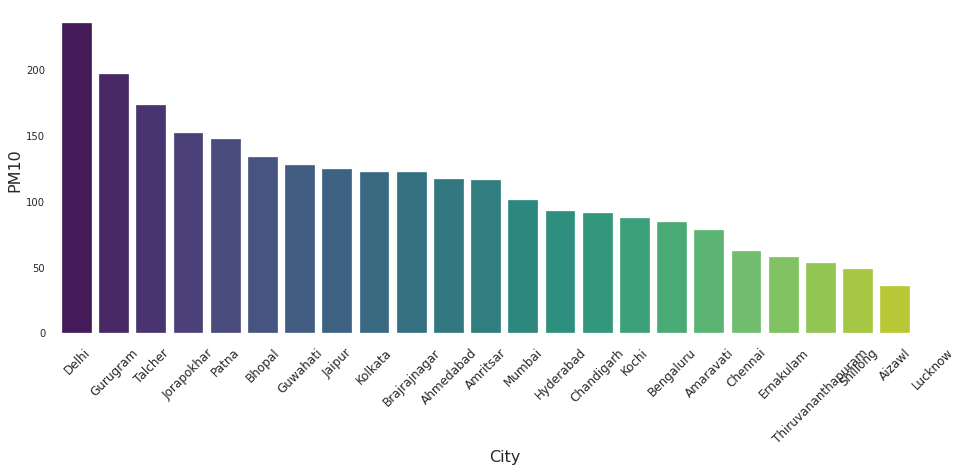

In [15]:
barplot(city_day,'PM10')

# 3. SO2

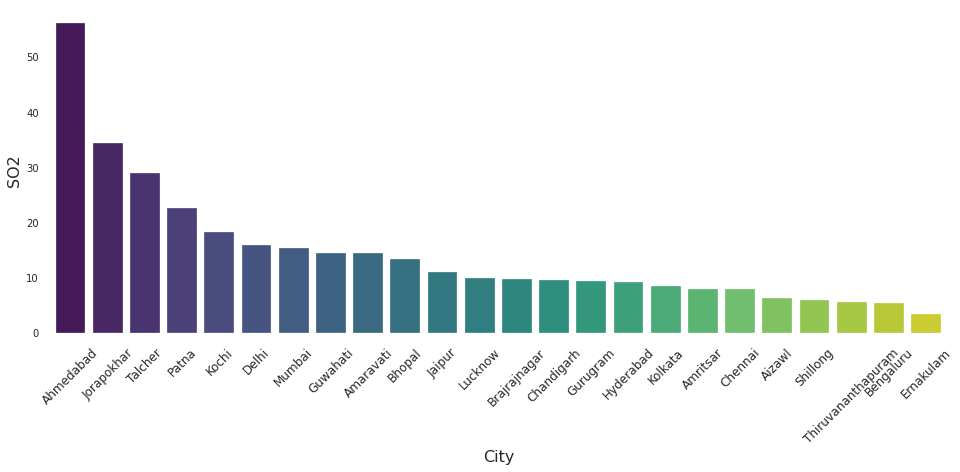

In [16]:
barplot(city_day,'SO2')

# 4. NO2

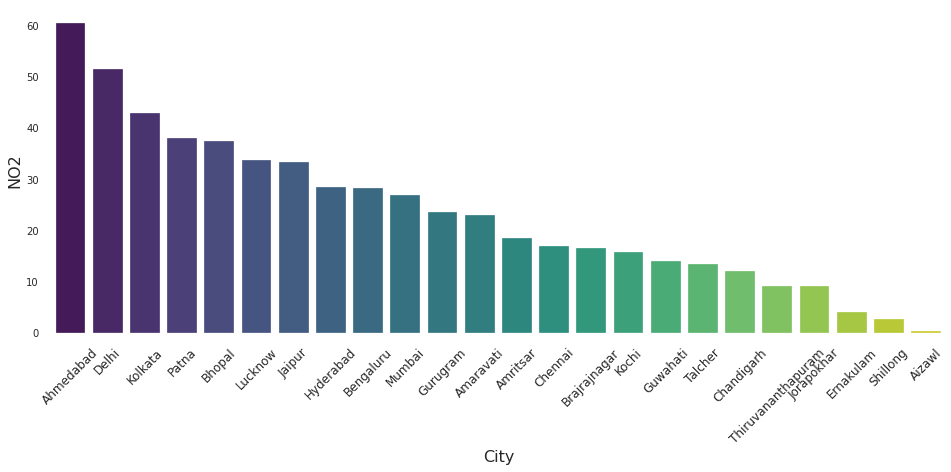

In [17]:
barplot(city_day,'NO2')

# 5. CO

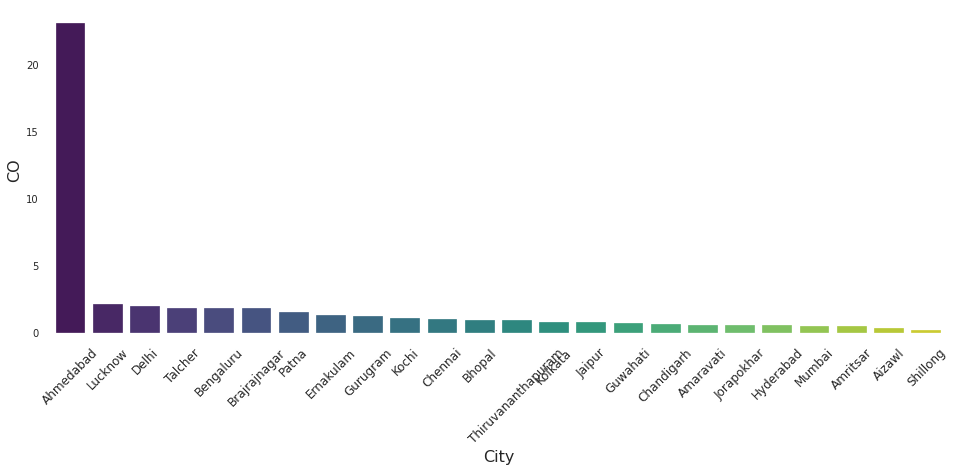

In [18]:
barplot(city_day,'CO')

# 6. NH3

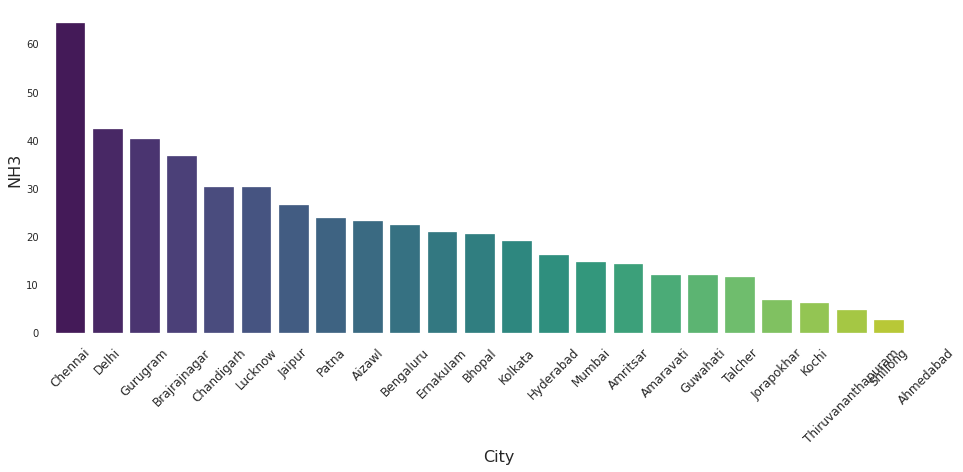

In [19]:
barplot(city_day,'NH3')

# 7. AQI

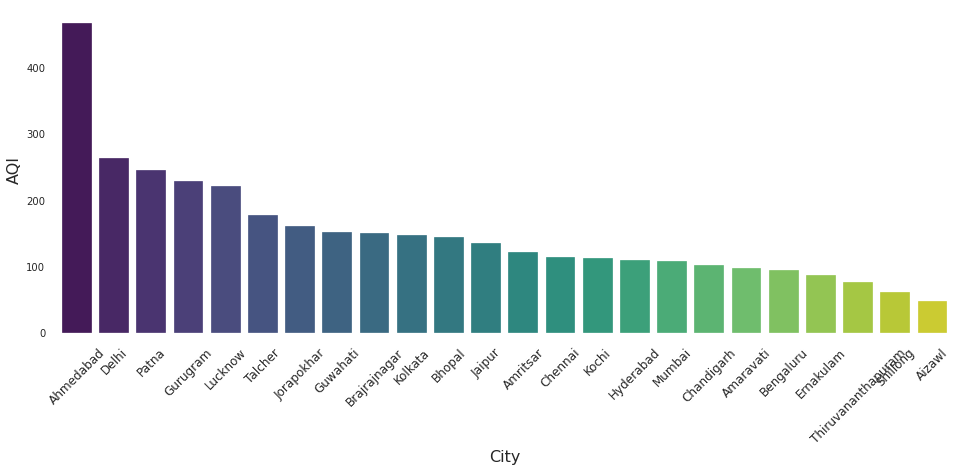

In [20]:
barplot(city_day,'AQI')

* As expected we can see maximum amounts of pollutants in metropolitan cities with large populations and significant commercial and maunfacturing activities.
* The level of pollutants decrease as the size of the city decreases.

## Now we will check the pollution levels with repect to time

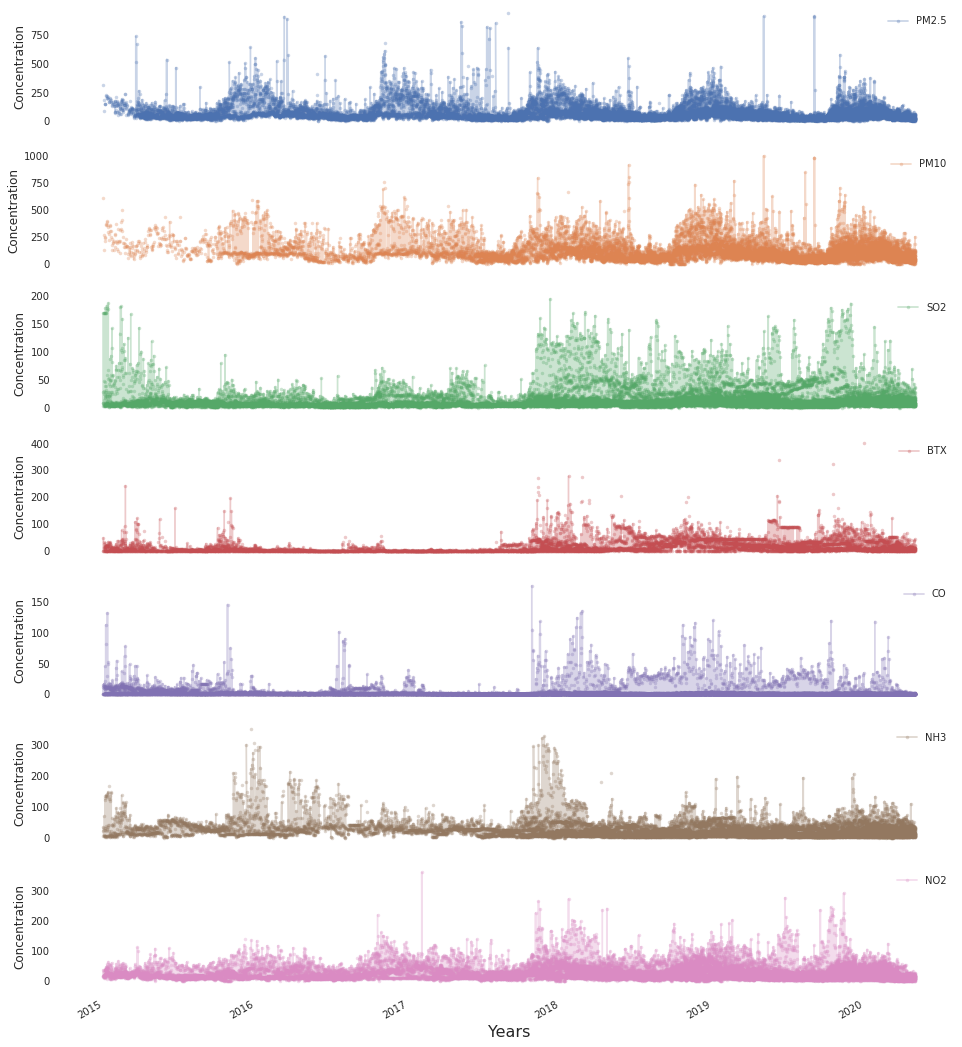

In [21]:
city_day.set_index('Date',inplace=True)  # only run this line once, second time it will give out error
pollutants=['PM2.5','PM10','SO2','BTX','CO','NH3','NO2']

axes=city_day[pollutants].plot(marker='.',figsize=(16,20),subplots=True,alpha=0.3)
for axes in axes:
    axes.set_xlabel('Years',fontsize=16)
    axes.set_ylabel('Concentration',fontsize=12)
plt.show()

* There are indications of seasonality towards the increase in PM2.5 and PM10 levels.
* We should take a closer look to determine the exact nature of the trend.
* We can also observe a clear increase in SO2, CO and BTX levels from 2018 onwards. 

In [22]:
def seasonality(df,val):
    df['year']=[d.year for d in df.Date]   
    df['months']=[d.strftime('%m') for d in df.Date]
    
    fig,axes=plt.subplots(1,2,figsize=(16,8))
    
    sns.boxplot(x='year',y=val, data=df,ax=axes[0])
    sns.lineplot(x='months',y=val,data=df.loc[~df.year.isin([2020]),:]) # not including 2020 as data is available
    axes[0].set_title('Yearly Boxplot',fontsize=14)                     # onlt till May
    axes[1].set_title('Monthly Lineplot',fontsize=14)
    plt.show()

* Now let's explore the seasonality of the pollution levels in depth.
* We will be seeing the trends in each type of pollutant individually with the help of boxplots and lineplots

# Yearly and Monthly Distributions

# 1. PM10

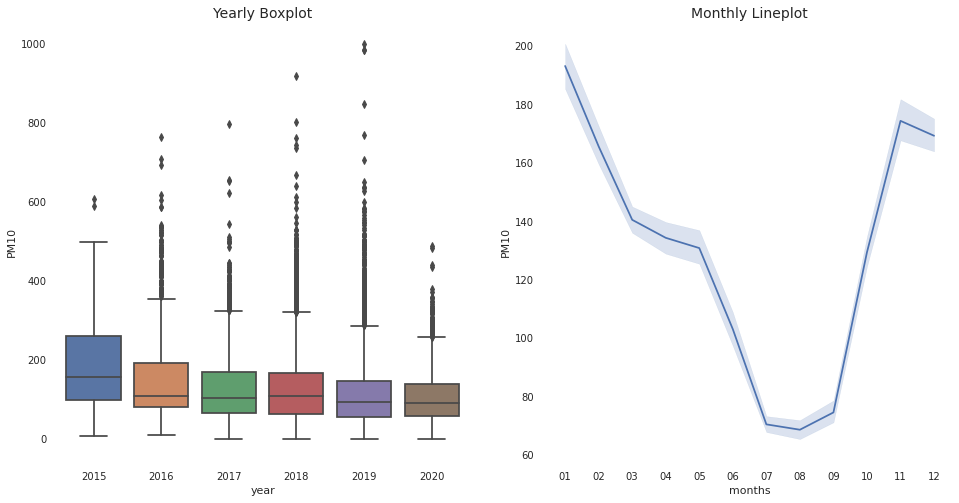

In [23]:
city_day2=city_day.copy()  # df with date as index
city_day.reset_index(inplace=True)  # only run this line once, second time it will give out error
seasonality(city_day,'PM10')

# 2.PM2.5

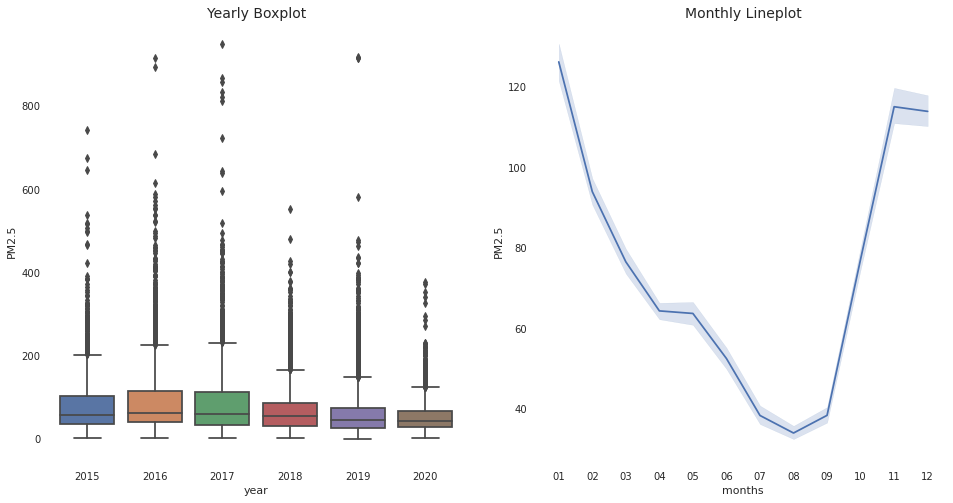

In [24]:
seasonality(city_day,'PM2.5')

# 3. SO2

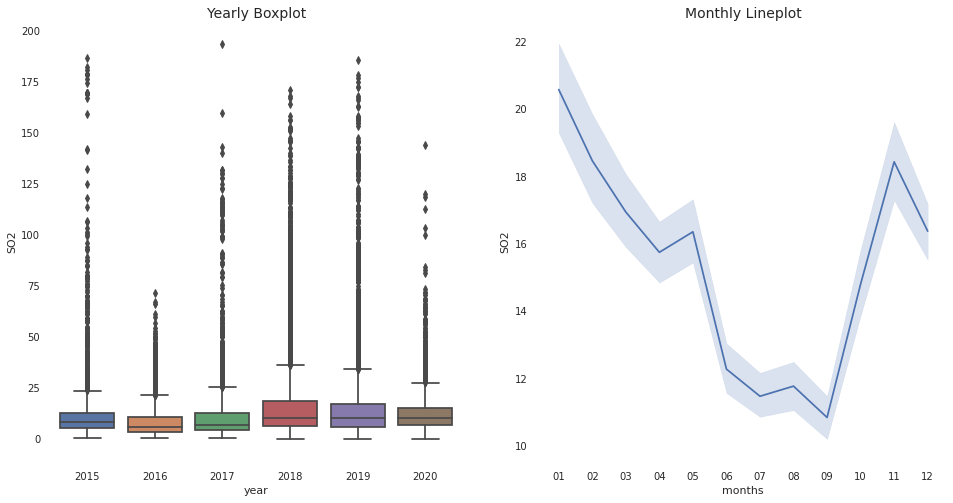

In [25]:
seasonality(city_day,'SO2')

# 4. NO2

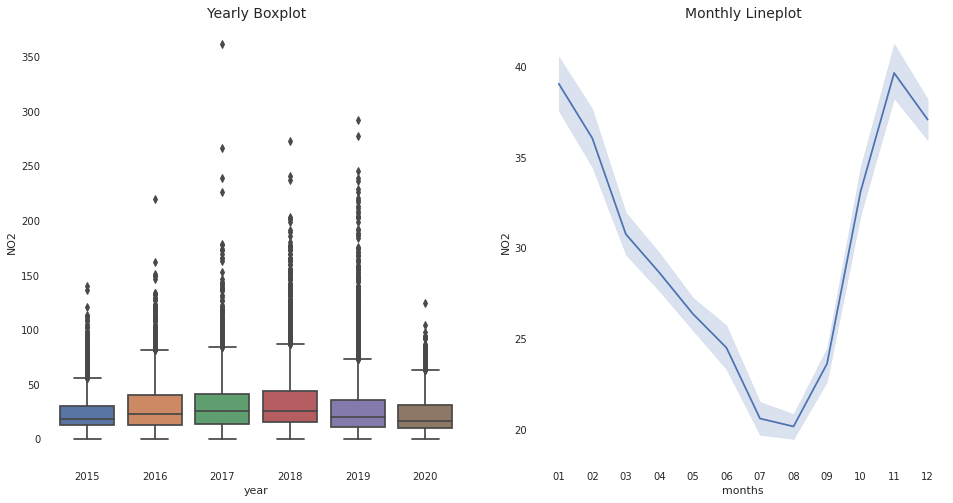

In [26]:
seasonality(city_day,'NO2')

# 5. BTX

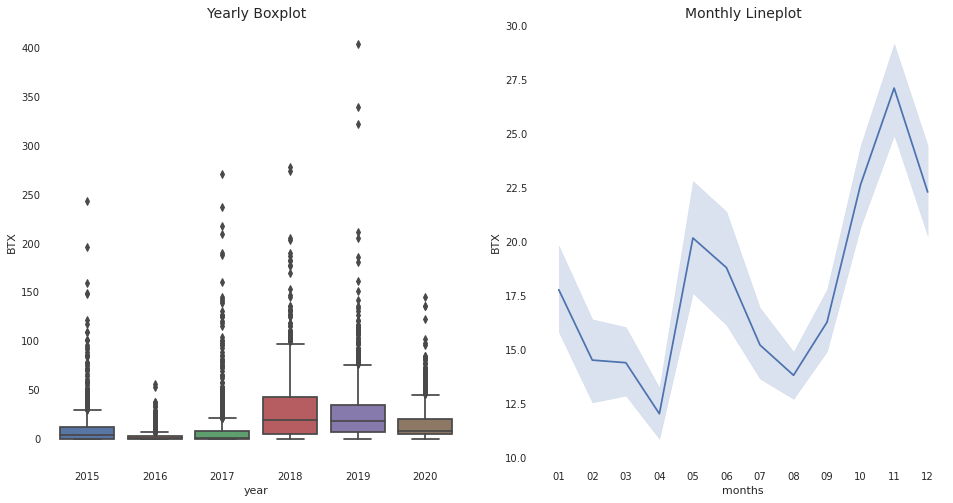

In [27]:
seasonality(city_day,'BTX')

# 6.O3

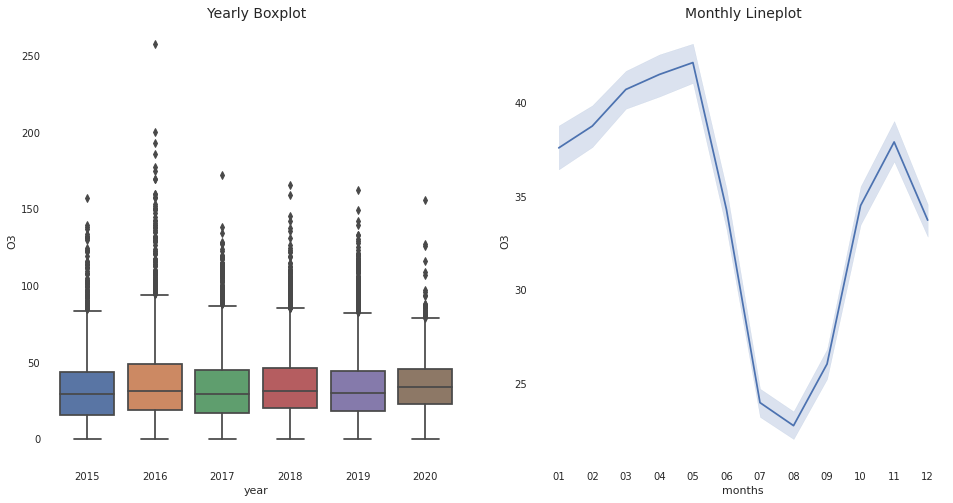

In [28]:
seasonality(city_day,'O3')

# 7. AQI

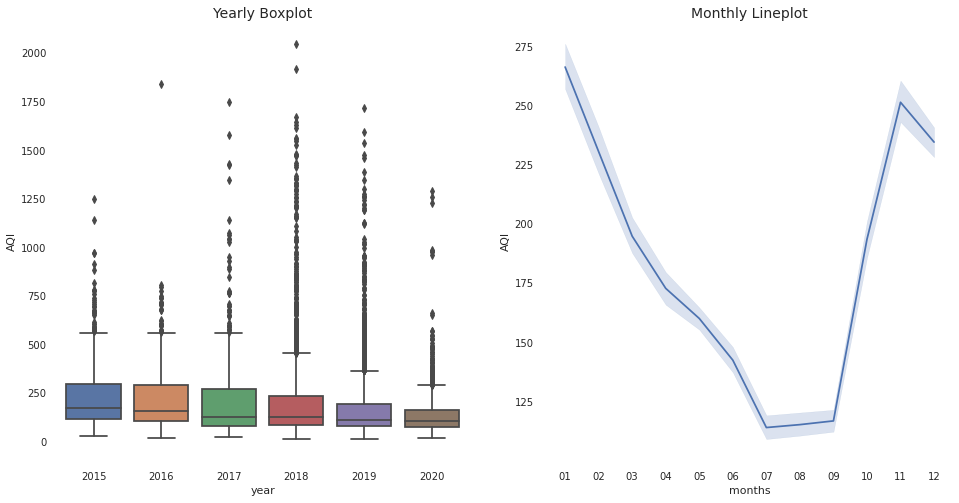

In [29]:
seasonality(city_day,'AQI')

* The general trend amongst all pollutants is that their levels drop in the summer and monsoon months between April and September, after which they experience a sharp rise during the winters.
* From the boxplots we see that SO2 and NO2 levels increased 2018 onwards.
* We can notice that the 3rd quantile values for all pollutants as well as AQI for 2019 are genreally lower than those of 2018, this can be due to the fact that 2019 was an extremely wet year for the Indian Subcontinent. The rainfall amounts during both the Southwest Monsoon (June to September) and Northeast Monsoon (October to December) remained **109 per cent** of the Long Period Average (LPA).

# AQI Comparison between major cities
#### We will be selecting major cities from various parts of the country for the comaprison, as that will give us a clear interpretation of the overall effect of the lockdown. 

In [30]:
cities=['Ahmedabad','Bengaluru','Chennai','Delhi','Kolkata']

city_day_cities=city_day[city_day['Date'] >= '2019-01-01']
AQI_table=city_day_cities[city_day_cities['City'].isin(cities)]
AQI_table=AQI_table[['Date','City','AQI','AQI_Bucket']]
AQI_table

,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.0,Severe
1462,2019-01-02,Ahmedabad,1246.0,Severe
1463,2019-01-03,Ahmedabad,1719.0,Severe
1464,2019-01-04,Ahmedabad,1264.0,Severe
1465,2019-01-05,Ahmedabad,1127.0,Severe
...,...,...,...,...
18357,2020-04-27,Kolkata,44.0,Good
18358,2020-04-28,Kolkata,45.0,Good
18359,2020-04-29,Kolkata,51.0,Satisfactory
18360,2020-04-30,Kolkata,54.0,Satisfactory


In [31]:
AQI_table_pivot=AQI_table.pivot(index='Date',columns='City',values='AQI')
AQI_table_pivot.head(7)

City,Ahmedabad,Bengaluru,Chennai,Delhi,Kolkata
Date,,,,,
2019-01-01,1474.0,128.0,212.0,475.0,370.0
2019-01-02,1246.0,103.0,158.0,501.0,351.0
2019-01-03,1719.0,101.0,167.0,537.0,363.0
2019-01-04,1264.0,106.0,192.0,432.0,431.0
2019-01-05,1127.0,104.0,116.0,440.0,391.0
2019-01-06,908.0,115.0,186.0,371.0,346.0
2019-01-07,236.0,120.0,168.0,331.0,335.0


In [32]:
AQI_table_pivot.fillna(method='bfill',inplace=True)
AQI_table_pivot.describe()

City,Ahmedabad,Bengaluru,Chennai,Delhi,Kolkata
count,487.000000,487.000000,487.000000,487.000000,487.000000
mean,468.825462,90.620123,95.897331,225.106776,145.737166
std,290.036390,25.063406,39.700081,114.118724,97.672632
min,86.000000,48.000000,47.000000,51.000000,31.000000
25%,282.000000,69.000000,72.000000,126.000000,66.000000
50%,414.000000,88.000000,84.000000,205.000000,110.000000
75%,544.000000,107.000000,108.000000,300.000000,207.500000
max,1719.000000,174.000000,306.000000,659.000000,475.000000


In [33]:
fig=make_subplots(rows=5,cols=1,subplot_titles=('Ahmedabad','Bengaluru','Chennai','Delhi','Kolkata'))

fig.add_trace(go.Bar(x=AQI_table_pivot.index,y=AQI_table_pivot['Ahmedabad']
                     ,marker=dict(color=AQI_table_pivot['Ahmedabad']
                                  ,coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=AQI_table_pivot.index,y=AQI_table_pivot['Bengaluru']
                     ,marker=dict(color=AQI_table_pivot['Bengaluru']
                                  ,coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=AQI_table_pivot.index,y=AQI_table_pivot['Chennai']
                     ,marker=dict(color=AQI_table_pivot['Chennai']
                                  ,coloraxis="coloraxis")),3,1)

fig.add_trace(go.Bar(x=AQI_table_pivot.index,y=AQI_table_pivot['Delhi']
                     ,marker=dict(color=AQI_table_pivot['Delhi']
                                  ,coloraxis="coloraxis")),4,1)

fig.add_trace(go.Bar(x=AQI_table_pivot.index,y=AQI_table_pivot['Kolkata']
                     ,marker=dict(color=AQI_table_pivot['Kolkata']
                                  ,coloraxis="coloraxis")),5,1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout( width=1000,height=1200,shapes=[dict(type= 'line',yref= 'paper'
                                                       ,y0= 0,y1= 1,xref= 'x',x0= '2020-03-25',x1= '2020-03-25')])

fig.show()

* The graph is seperated into 'Before Lockdown' and 'After Lockdown' by the vertical black line placed on the date 25-03-2020  
* We can see a clear decrease in AQI levels in all cities after the lockdown came into effect.

# Comparison of Lockdown on individual pollutants

In [34]:
cities=['Ahmedabad','Bengaluru','Chennai','Delhi','Kolkata']

pollutants_2019=city_day[(city_day['Date'] >= '2019-01-01') & (city_day['Date'] <= '2019-05-01')]
pollutants_2019.fillna(method='bfill',inplace=True)
pollutants_2019.set_index('Date',inplace=True)

pollutants_2020=city_day[(city_day['Date'] >= '2020-01-01') & (city_day['Date'] <= '2020-05-01')]
pollutants_2020.fillna(method='bfill',inplace=True)
pollutants_2020.set_index('Date',inplace=True)

pollutants_2019=pollutants_2019[pollutants_2019['City'].isin(cities)][['City','SO2','CO','PM2.5','NO']]
pollutants_2020=pollutants_2020[pollutants_2020['City'].isin(cities)][['City','SO2','CO','PM2.5','NO']]


In [35]:
def comparison(city):
    # Figure for 2019
    fig=go.Figure()
    fig.add_trace(go.Scatter(x=pollutants_2019.index,y=pollutants_2019[pollutants_2019['City']==city]['SO2']
                             ,line=dict(dash='dash',color='blue'),name='SO2'))
    
    fig.add_trace(go.Scatter(x=pollutants_2019.index,y=pollutants_2019[pollutants_2019['City']==city]['CO']
                             ,line=dict(dash='solid',color='green'),name='CO'))
                  
    fig.add_trace(go.Scatter(x=pollutants_2019.index,y=pollutants_2019[pollutants_2019['City']==city]['PM2.5']
                             ,line=dict(dash='solid',color='rosybrown'),name='PM2.5'))
                  
    fig.add_trace(go.Scatter(x=pollutants_2019.index,y=pollutants_2019[pollutants_2019['City']==city]['NO']
                             ,line=dict(dash='dashdot',color='slategrey'),name='NO'))
                  
    fig.update_layout(title_text=city+' 2019 ',width=800,height=500)
    fig.show()
    
    # Figure for 2020
    
    fig=go.Figure()
    fig.add_trace(go.Scatter(x=pollutants_2020.index,y=pollutants_2020[pollutants_2020['City']==city]['SO2']
                             ,line=dict(dash='dash',color='blue'),name='SO2'))
    
    fig.add_trace(go.Scatter(x=pollutants_2020.index,y=pollutants_2020[pollutants_2020['City']==city]['CO']
                             ,line=dict(dash='solid',color='green'),name='CO'))
                  
    fig.add_trace(go.Scatter(x=pollutants_2020.index,y=pollutants_2020[pollutants_2020['City']==city]['PM2.5']
                             ,line=dict(dash='solid',color='rosybrown'),name='PM2.5'))
                  
    fig.add_trace(go.Scatter(x=pollutants_2020.index,y=pollutants_2020[pollutants_2020['City']==city]['NO']
                             ,line=dict(dash='dashdot',color='slategrey'),name='NO'))
                  
    fig.update_layout(title_text=city+' 2020 ',width=800,height=500)
    fig.show()

In [36]:
comparison('Delhi')

In [37]:
comparison('Ahmedabad')

In [38]:
comparison('Chennai')

In [39]:
comparison('Kolkata')

In [40]:
comparison('Bengaluru')

#### There is a clear decrease in the concentrations of all pollutants after the Lockdown came into effect, especially in Ahmedabad, Delhi and Bengaluru.
#### This decline can be due to the following reasons:
* Reduced Commercial and Industrial activity
* Drastic decrease in level of vehicular movement.
* Suspension of all construction projects.